In [1]:
#Взять из прошлого домашнего задания ряд (в двух вариантах - стационарный и нет) 
#и приблизить оба эти варианта моделями из класса MA. 
#Оценить качество и прислать соображения почему была выбрана та или иная модель

In [2]:
import pandas as pd

In [3]:
#original time series
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
all_series = {
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Daily total female births in California": female_births["Count"]
    
}

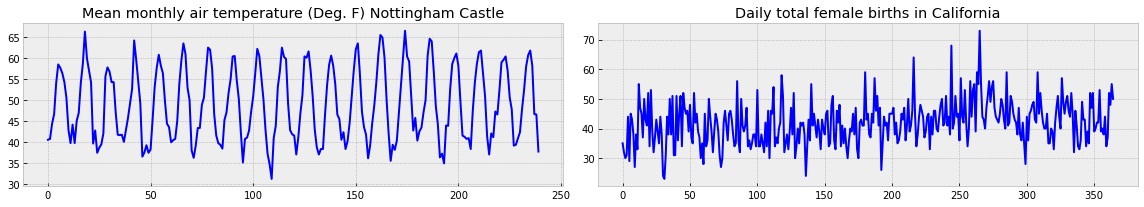

In [6]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [7]:
def exponential_moving_average(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return pd.Series(result)

In [8]:
def weighted_moving_average(series, n, weights):
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    wma = series.rolling(n).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True)
    return wma

In [9]:
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

In [10]:
import numpy as np
ema1 = exponential_moving_average(mean_monthly_temp["Deg"], 0.2)
ema2 = exponential_moving_average(female_births["Count"], 0.2)

wma1 = weighted_moving_average(mean_monthly_temp["Deg"], 7, [1,1,2,3,5,8,13])
wma2 = weighted_moving_average(female_births["Count"], 7, [1,1,2,3,5,8,13])

ma1 = moving_average(mean_monthly_temp["Deg"], 7)
ma2 = moving_average(female_births["Count"], 7)


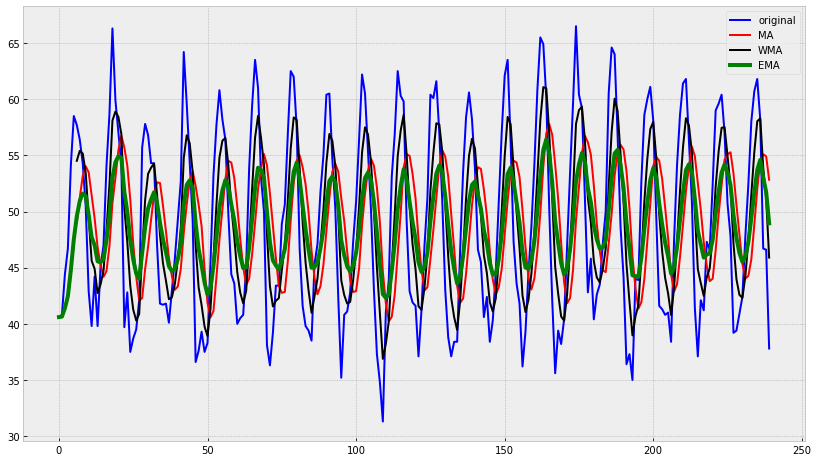

In [11]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(mean_monthly_temp["Deg"], color='blue',label='original')
    plt.plot(ma1, color='red', linewidth='2', label='MA')
    plt.plot(wma1, color='black', linewidth='2', label='WMA')
    plt.plot(ema1, color='green', linewidth='4', label='EMA')
    plt.legend()

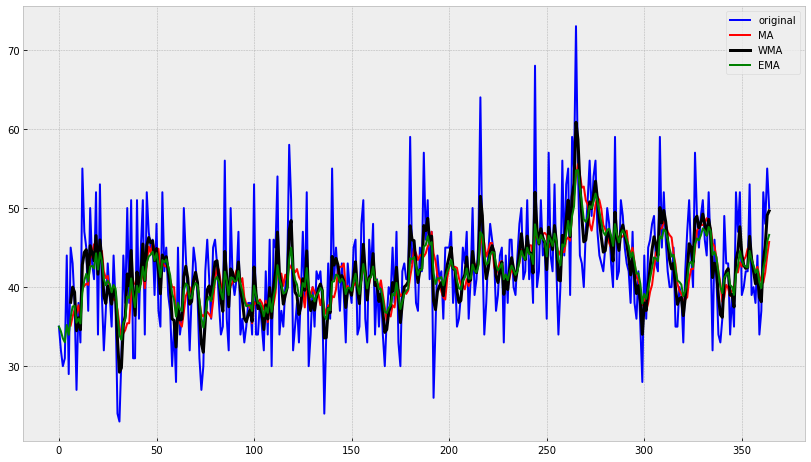

In [12]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(female_births["Count"], color='blue',label='original')
    plt.plot(ma2, color='red', linewidth='2', label='MA')
    plt.plot(wma2, color='black', linewidth='3', label='WMA')
    plt.plot(ema2, color='green', linewidth='2', label='EMA')
    plt.legend()

In [13]:
#Conclusion: two time series are taken:
#mean_monthly_temp (non stationary)
#female_births ( stationary)
#both series have no trend and stationary series has no season, therefore ma, wma, ema models are chosen.
#WMA can be chosen as an optimal model, which smoothes some time interval, so that both series shows similar behaviour 
#in interval between 0-260